<h1 align="center"><font color="blue">Alzheimer's Disease Data Set Analysis and Model Prediction</h1>

<div style="text-align: center;">
    <img src ="https://www.bu.edu/files/2024/06/ai-alzheimers-feat.jpg" width="600" alt="AI and Alzheimer's">
</div>

### Alzheimer's Disease Data set
This dataset provides comprehensive insights into various factors associated with Alzheimer's Disease, encompassing demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, as well as symptoms.

### Objectives of this Assignment:
- Explore importance factors associated with Alzheimer's statistical analysis.
- Exploratory data analysis (EDA) to analyze and investigate data sets using data visualization methods.
- Data Preparation, Feature Engineering.
- Training various models to test accuracy of prediction.
- Feature Importance (to identify top 10 important factors most associated with Alzheimer's disease)
- Hyperparameter tunning (to find out best set of parameters) 

### Machine Learning model used are:
1. Logistic Regression Classification
2. K-Nearest Neighbor (K-NN) Classification
3. Support Vector Machine (SVM)
4. Decision Tree Classification
5. Random Forest Classification

Classification involves predicting the class labels or categories of data. In this context, our objective is to forecast the potential outcomes, specifically whether an individual may be positive or negative for Alzheimer's disease. Subsequently, we will train models and assess their accuracy in predicting the diagnosis.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings("ignore")

### 2. Load external data

In [2]:
# Import the dataset and print records from it.
# Save the dataframe name as: df

df = pd.read_csv("alzheimers_disease_data.csv")
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0              13.297218          6.327112     1.347214  ...   
1               4.542524          7.619885     0.518767  ...   
2              19.555085          7.844988     1.826335  ...   
3              12.209266          8.428001     7.435604  ...   
4              18.454356          6.310461     0.795498  ...   
...                  ...               ...          ...  ...   
2144            1.561126          4.049964     6.555306  ...   
2145           18.767261          1.360667     2.904662  ...   
2146            4.594670          9.886002     8.120025  ...   
2147            8.674505          6.354282     1.263427  ...   
2148            7.890703          6.570993     7.941404  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
0                    0                   0  1.725883          0   
1                    0                   0  2.592424          0   
2                    0                   0  7.119548          0   
3                    0                   1  6.481226          0   
4                    0                   0  0.014691          0   
...                ...                 ...       ...        ...   
2144                 0                   0  4.492838          1   
2145                 0                   1  9.204952          0   
2146                 0                   0  5.036334          0   
2147                 0                   0  3.785399          0   
2148                 0                   1  8.327563          0   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0                  0                   0                          1   
1                  0                   0                          0   
2                  1                   0                          1   
3                  0                   0                          0   
4                  0                   1                          1   
...              ...                 ...                        ...   
2144               0                   0                          0   
2145               0                   0                          0   
2146               0                   0                          0   
2147               0                   0                          0   
2148               1                   0                          0   

      Forgetfulness  Diagnosis  DoctorInCharge  
0                 0          0       XXXConfid  
1                 1          0       XXXConfid  
2                 0          0       XXXConfid  
3                 0          0       XXXConfid  
4                 0          0       XXXConfid  
...             ...        ...             ...  
2144              0          1       XXXConfid  
2145              0          1       XXXConfid  
2146              0          1       XXXConfid  
2147              1          1       XXXConfid  
2148              1          0       XXXConfid  

[2149 rows x 35 columns]

### 3. Understanding Data

In [3]:
#loading top 5 records of the dataframe.

df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [4]:
df.shape

(2149, 35)

In [5]:
# Describe the distribution of each feature in the data

df.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

In [6]:
# Check for duplicated rows in Dataframe

sum(df.duplicated())

0

In [7]:
# Print information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [8]:
# Drop unnecessary columns ie. PatientID and DoctorInCharge 

df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

#### Observation from Data summary:
- The dataset consists of 2,149 observations without duplicates.
- The values are non-null and numerical data.
- After removing the unneccessary columns, there are now 33 features consisting of categorical and numerical.

### 4. Exploratory Data Analysis
This section will examine the dataset variables through various plots and charts.

#### Correlation Analysis: 
This analysis utilizes the correlation coefficient to measure the strength of the relationship between variables. A negative coefficient indicates a negative correlation, where an increase in one variable corresponds to a decrease in another. Conversely, a positive coefficient indicates a positive correlation, where an increase in one variable corresponds to an increase in another.

In [9]:
# Correlation Analysis

correlation_matrix = df.corr()
correlation_matrix

Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.007528   
Diabetes                  -0.005708 -0.018300  -0.019588        0.003059   
Depression                -0.008752  0.018113  -0.005411        0.027573   
HeadInjury                -0.040337  0.004013  -0.009364       -0.008951   
Hypertension               0.003954 -0.002641   0.012848       -0.016950   
SystolicBP                -0.005324  0.011657  -0.027086       -0.016782   
DiastolicBP               -0.004462 -0.026059   0.010310       -0.002553   
CholesterolTotal           0.000392 -0.009568  -0.011757       -0.041598   
CholesterolLDL             0.003588  0.016271   0.007907        0.050504   
CholesterolHDL             0.006803 -0.005846  -0.021828       -0.008125   
CholesterolTriglycerides  -0.003062 -0.012427  -0.007173       -0.025763   
MMSE                      -0.004235  0.025330  -0.012504        0.026090   
FunctionalAssessment       0.005508  0.033324  -0.004704        0.020269   
MemoryComplaints           0.012343  0.003880   0.003687       -0.000165   
BehavioralProblems         0.038973  0.006099  -0.019363        0.010473   
ADL                       -0.038658  0.003865   0.010475        0.031934   
Confusion                  0.009002 -0.030583   0.022431       -0.008168   
Disorientation             0.027523  0.017506  -0.018132       -0.017568   
PersonalityChanges        -0.009470  0.025919  -0.030035       -0.019950   
DifficultyCompletingTasks  0.013900 -0.001636   0.019363        0.013033   
Forgetfulness             -0.019279 -0.028537  -0.034619       -0.008685   
Diagnosis                 -0.005488 -0.020975  -0.014782       -0.043966   

                                BMI   Smoking  AlcoholConsumption  \
Age                       -0.015677  0.020060            0.007323   
Gender                     0.005928  0.016650            0.004330   
Ethnicity                 -0.003176  0.031485            0.008363   
EducationLevel            -0.023514 -0.009904           -0.012646   
BMI                        1.000000  0.020437           -0.008997   
Smoking                    0.020437  1.000000            0.008363   
AlcoholConsumption        -0.008997  0.008363            1.000000   
PhysicalActivity           0.000742  0.010760            0.021696   
DietQuality                0.019922 -0.002048            0.020117   
SleepQuality              -0.005975 -0.001145           -0.003873   
FamilyHistoryAlzheimers    0.006446 -0.045811           -0.003707   
CardiovascularDisease     -0.005467  0.027955           -0.023632   
Diabetes                  -0.008980 -0.035810            0.000073   
Depression                -0.012507 -0.039363            0.008867   
HeadInjury                 0.016288 -0.019178           -0.008301   
Hypertension               0.004928 -0.021124           -0.006010   
SystolicBP                -0.019275 -0.024116           -0.030070   
DiastolicBP               -0.002524 -0.014112           -0.008909   
CholesterolTotal           0.001082 -0.010907           -0.033944   
CholesterolLDL             0.023684 -0.007393           -0.017042  

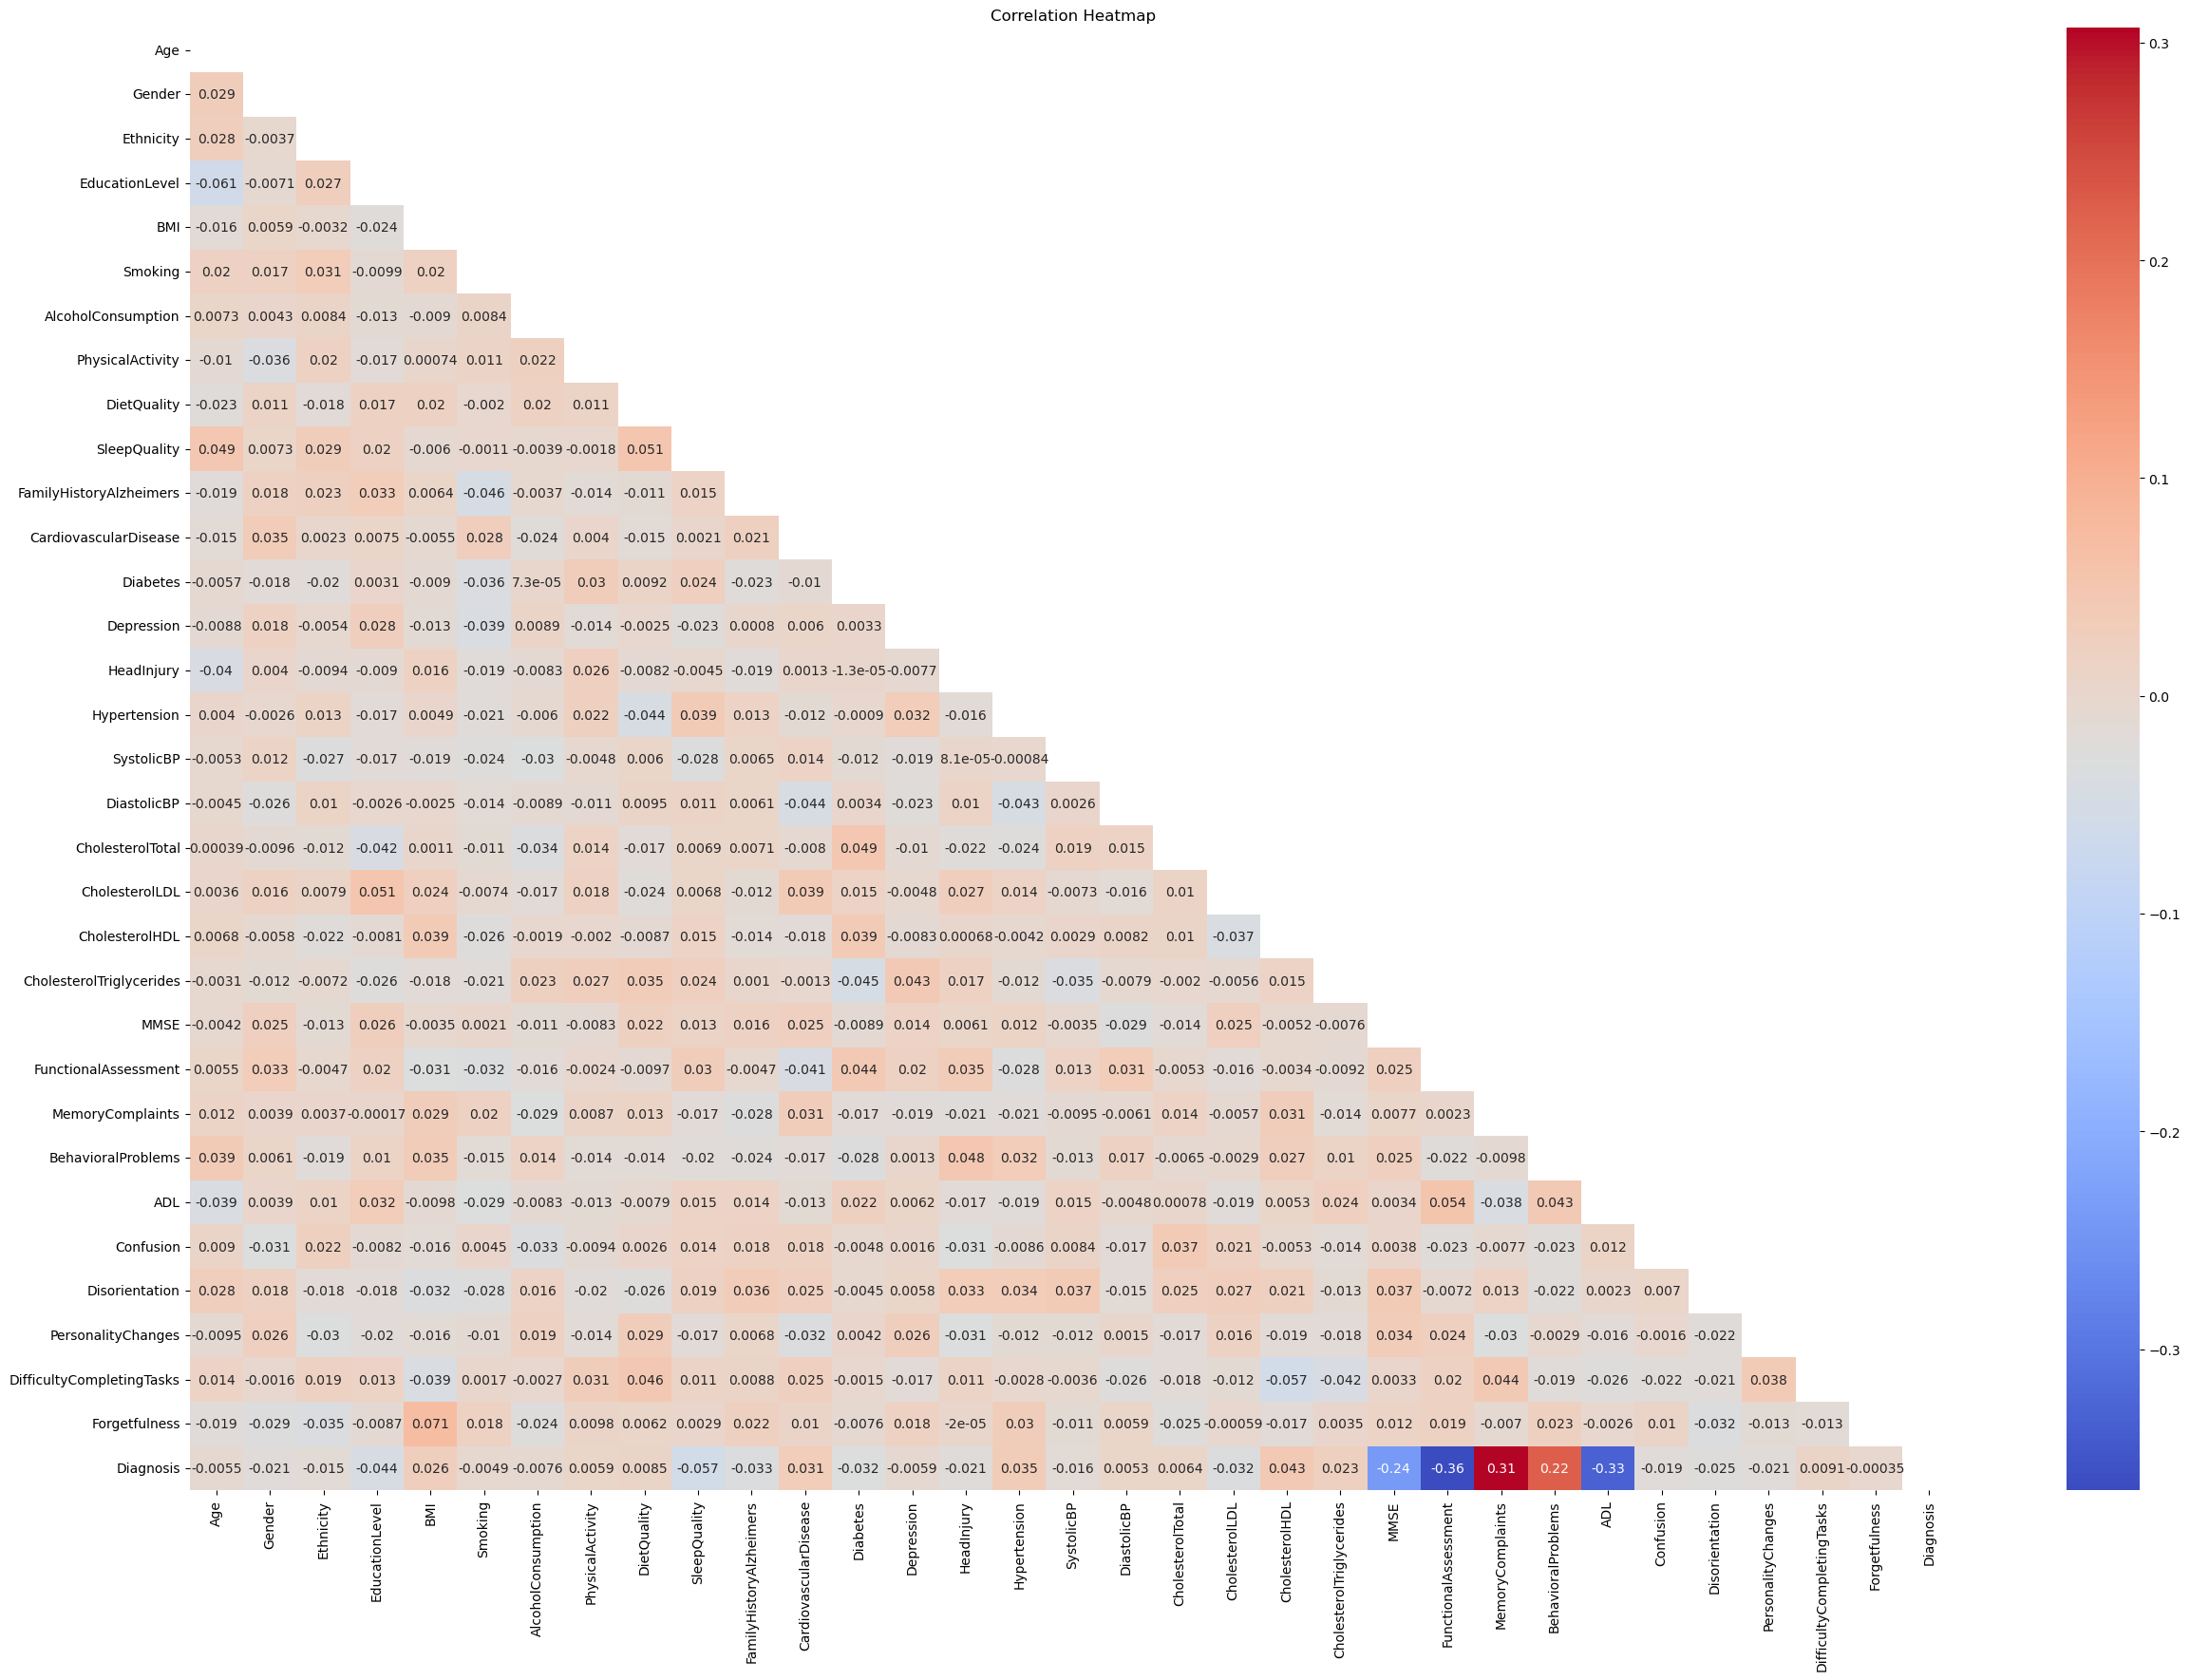

In [10]:
# Set up the matplotlib figure

# Adjust the figure size as needed
plt.figure(figsize=(30,20))  

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Use a seaborn heatmap to see this better
sns.heatmap(correlation_matrix, mask=mask, annot = True, cmap = "coolwarm")
plt.title('Correlation Heatmap')
plt.show()

#### Observation from Heatmap:
The heatmap analysis reveals no strong correlation between the features and the target variable. Notably, there are some negative correlations: MMSE (Mini-Mental State Examination score), Functional Assessment, and ADL (Activities of Daily Living score) with correlation values of -0.24, -0.36, and -0.33, respectively. These findings suggest that as the scores for MMSE, Functional Assessment, and ADL decrease, the target variable increases.

In [11]:
# Identify numerical columns: columns with unique value more than 10 are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]


# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

#Label categorical columns
category_labels = {
    'Diagnosis' : ['No', 'Yes'],
    'Gender' : ['Male', 'Female'],
    'Ethnicity' : ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel' : ['None', 'High School', 'Bachelor\s', 'Higher'],
    'Smoking' : ['No', 'Yes'],
    'FamilyHistoryAlzheimers' : ['No', 'Yes'],
    'CardiovascularDisease' : ['No', 'Yes'],
    'Diabetes' : ['No', 'Yes'],
    'Depression' : ['No', 'Yes'],
    'HeadInjury' : ['No', 'Yes'],
    'Hypertension' : ['No', 'Yes'],
    'MemoryComplaints' : ['No', 'Yes'],
    'BehavioralProblems' : ['No', 'Yes'],
    'Confusion' : ['No', 'Yes'],
    'Disorientation' : ['No', 'Yes'],
    'PersonalityChanges' : ['No', 'Yes'],
    'DifficultyCompletingTasks' : ['No', 'Yes'],
    'Forgetfulness' : ['No', 'Yes']
}

print("The Categorical Features are: ", "\n", categorical_columns, "\n")
print("The Numberical Features are: ", "\n", numerical_columns)

The Categorical Features are:  
 ['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'EducationLevel', 'Ethnicity', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking'] 

The Numberical Features are:  
 ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


Exploring feature variables associated with Alzheimer's Disease, based on:
<br>
(a) Categorical Features;
<br>
(b) Numerical Features

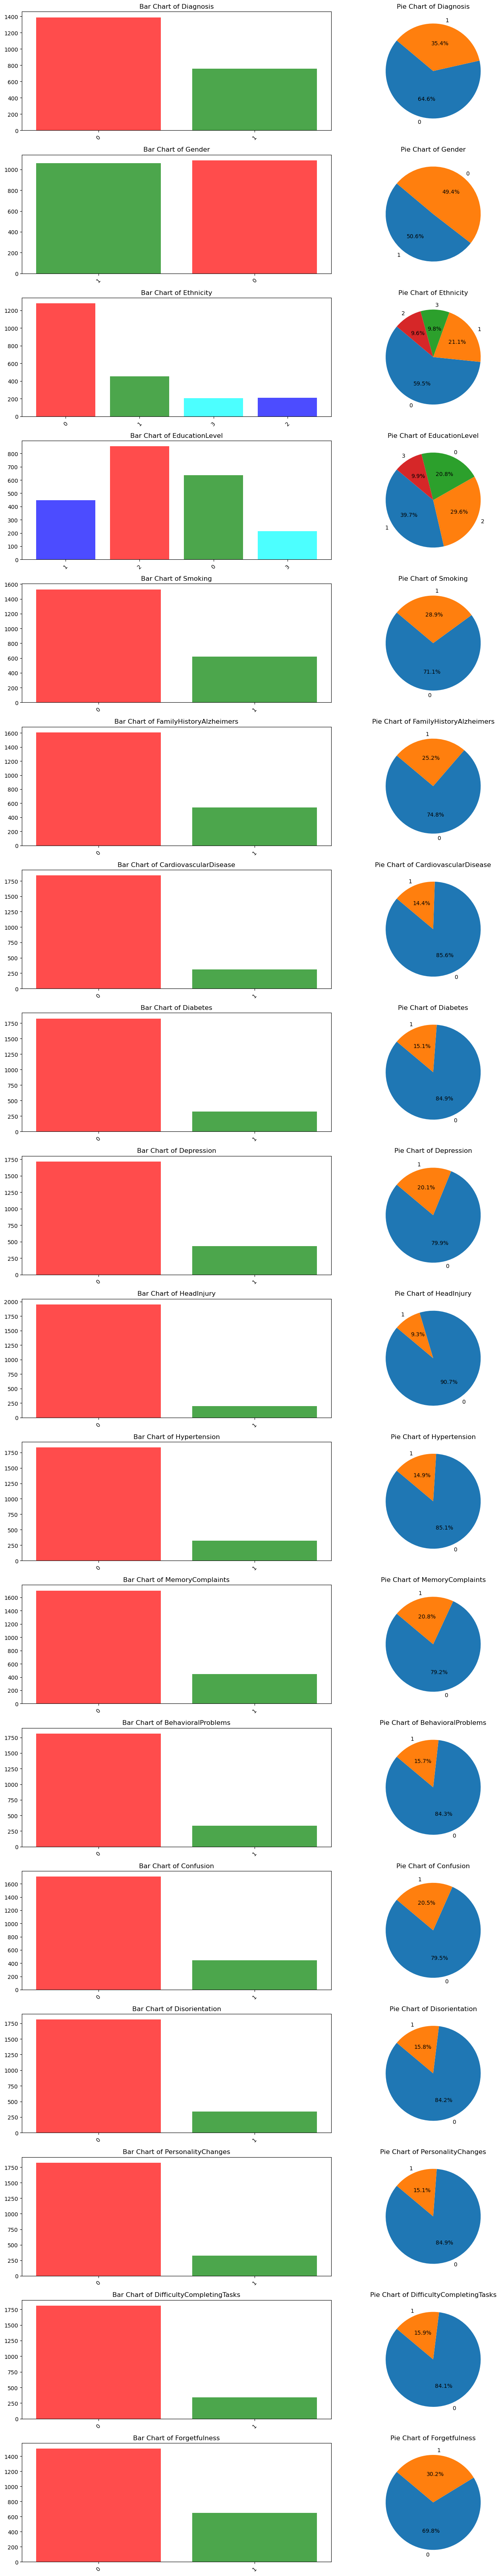

In [12]:
#(a) Categorical Features

# Create a figure with a 18x2 grid of subplots
fig, axs = plt.subplots(18, 2, figsize=(15, 65))

for i, col in enumerate(category_labels.keys()):
    if col not in df.columns:
        continue
        
    # Bar chart for categorical data (counts of each category)
    value_counts = df[col].value_counts()
    axs[i, 0].bar(value_counts.index, value_counts.values, color=["red", "green", "blue", "cyan"], alpha=0.7)
    axs[i, 0].set_title(f'Bar Chart of {col}')
    axs[i, 0].set_xticks(range(len(value_counts.index)))
    axs[i, 0].set_xticklabels(value_counts.index, rotation=45)
 
    # Pie chart categorical data
    pie_counts = df[col].value_counts()
    axs[i, 1].pie(pie_counts.values, labels=pie_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i, 1].set_title(f'Pie Chart of {col}')
        
# Save the figure as a JPG file
plt.savefig("subplots.jpg", format="jpeg")

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations from Visualization of Categorical Features
1. Gender Distribution: Balanced representation of male and female participants.
2. Diagnosis: Majority without Alzheimer’s disease.
3. Ethnicity and Education Level: Diverse representation across ethnicities. Varied educational backgrounds.
4. Smoking: More non-smokers than smokers.
5. Family History of Alzheimer’s: Slightly higher representation of no family history.
6. Cardiovascular Disease and Diabetes: Majority without these conditions.
7. Depression and Head Injury: Most participants report no depression or head injury.
8. Hypertension: Significant portion with hypertension.
9. Memory Complaints, Behavioral Problems, Confusion, and Disorientation: Less common issues reported.
10. Personality Changes, Difficulty Completing Tasks, and Forgetfulness: Also less frequent among participants.

Overall, the visualizations provide a comprehensive overview of the categorical features in the Alzheimer's disease dataset, highlighting key distributions and potential areas for further analysis.

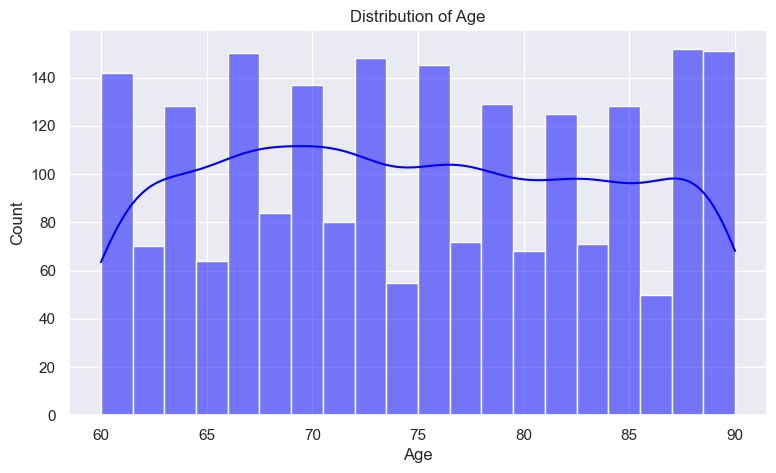

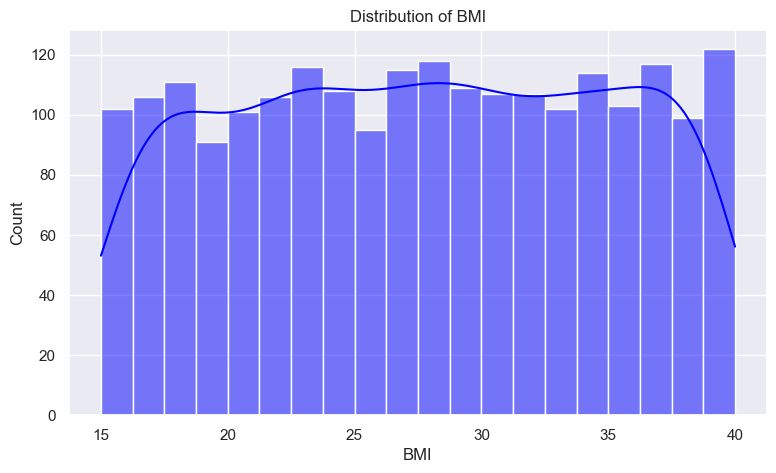

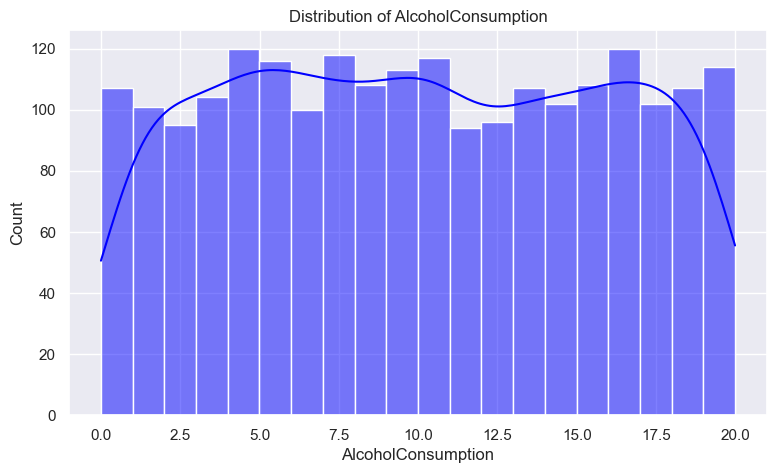

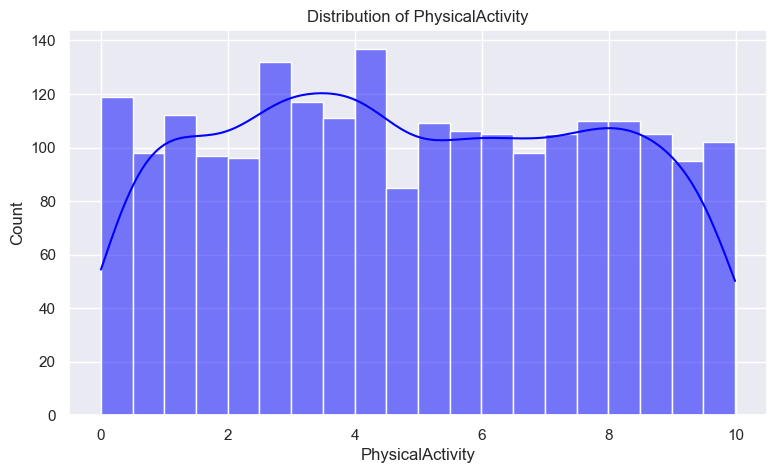

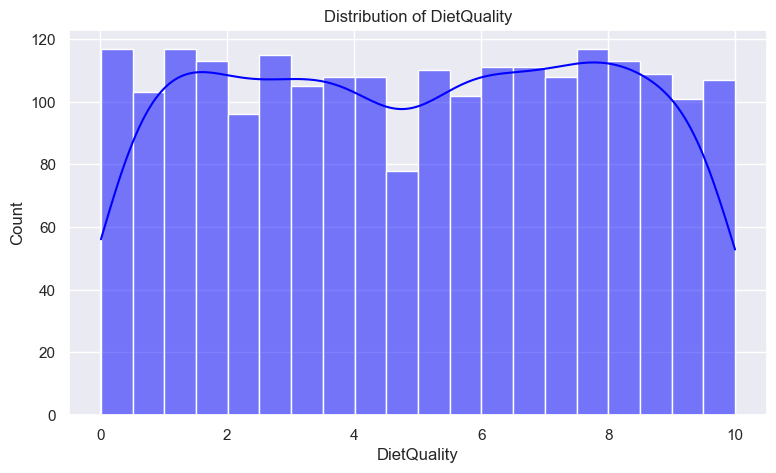

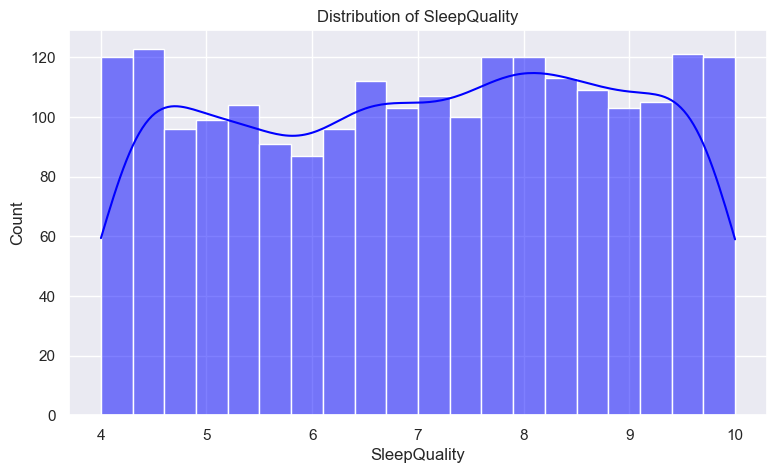

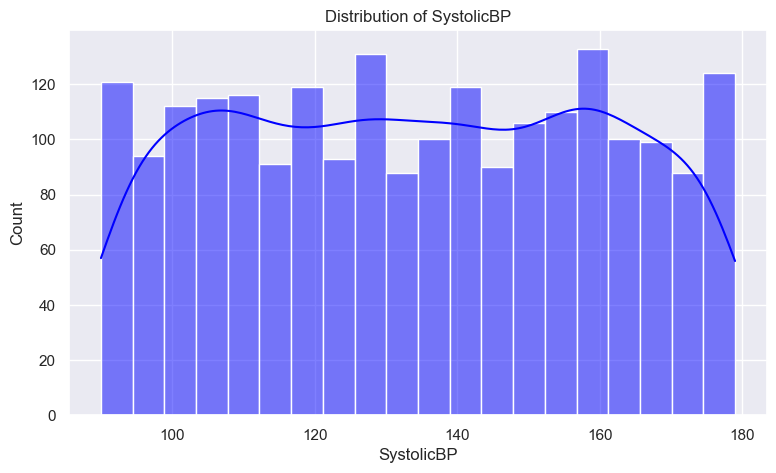

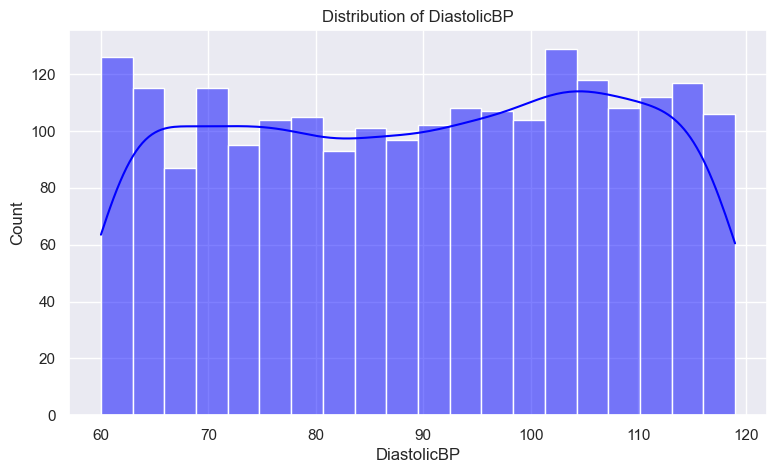

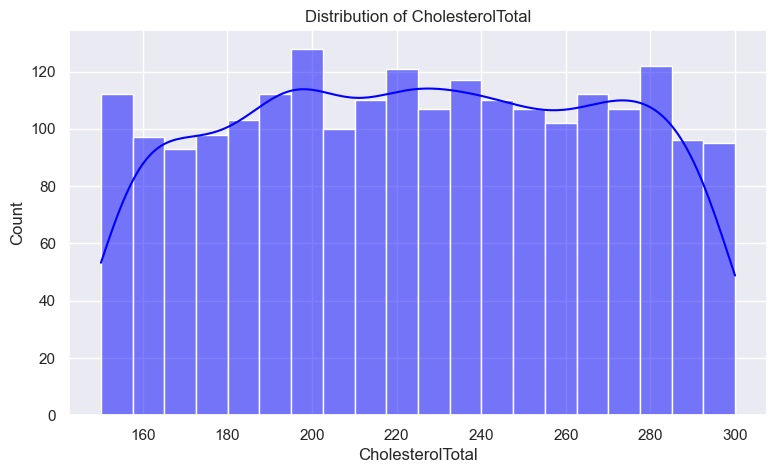

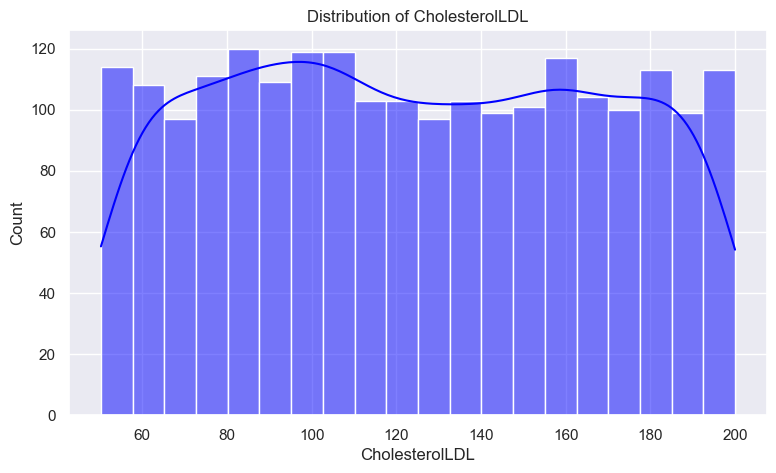

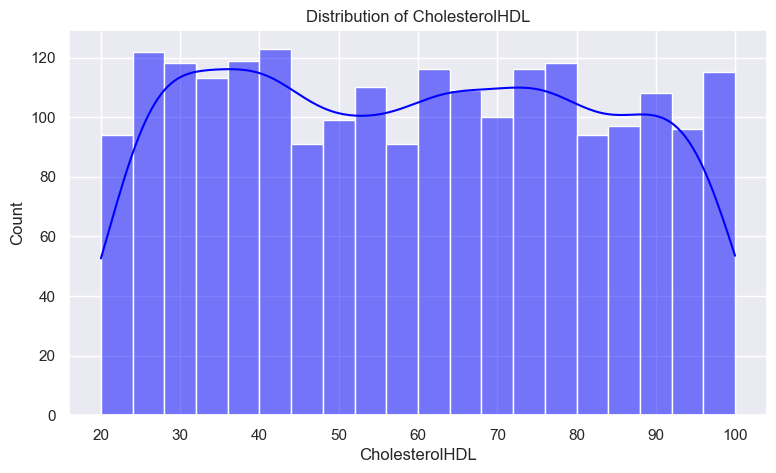

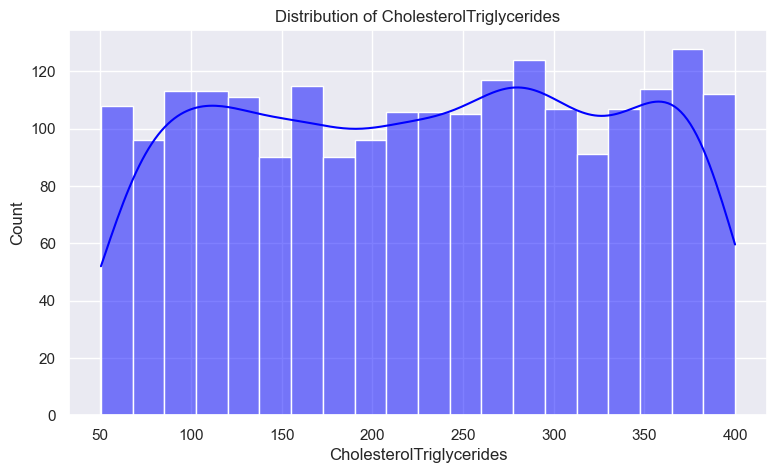

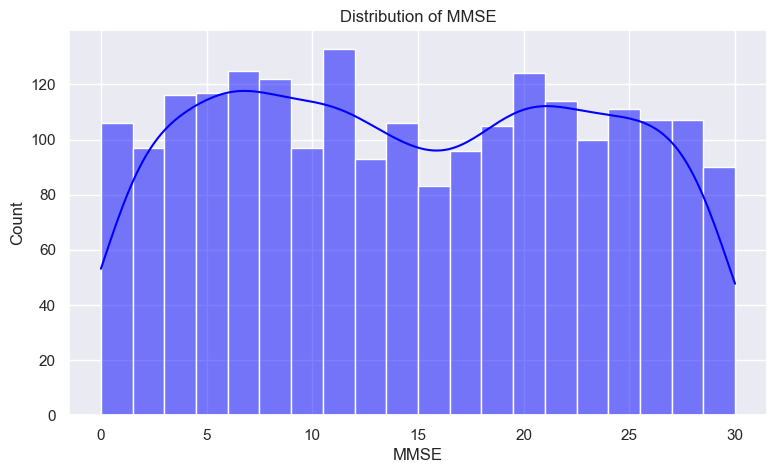

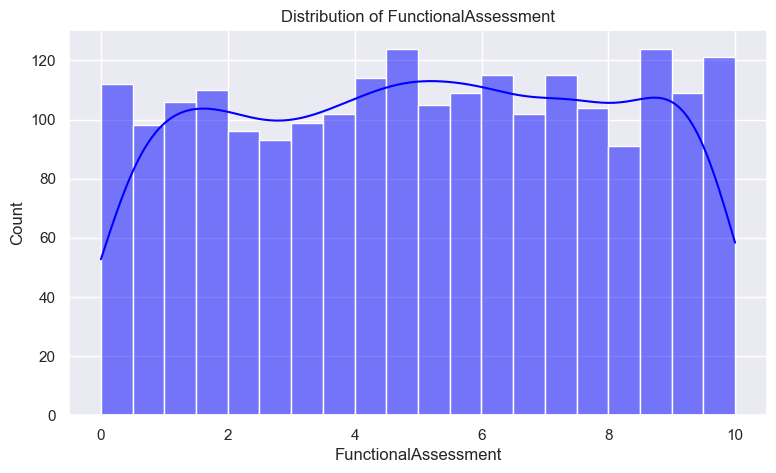

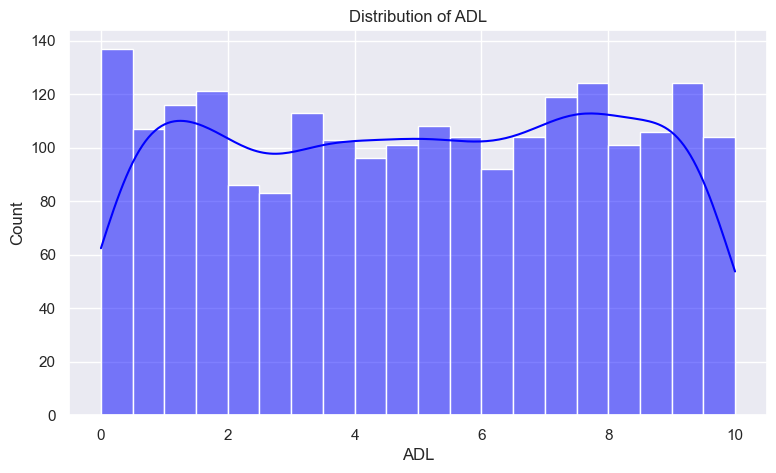

In [13]:
#(b) Numerical Features

for column in numerical_columns:
    plt.figure(figsize=(9,5))
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df, x=column, kde=True, bins=20, color="blue")
    plt.title(f'Distribution of {column}')
    
# Save the figure as a JPG file
plt.savefig("figure.jpg", format="jpeg")    

plt.show()

#### Observations from Visualization of Numerical Features
The Alzheimer’s disease dataset reveals key trends: 
1. Age Distribution: The peak around 75-80 years aligns with the typical age range for Alzheimer’s disease onset. Understanding this distribution can guide age-related analyses.
2. BMI Distribution: The common BMI range of 27-28 suggests that maintaining a healthy weight might be relevant for Alzheimer’s risk assessment.
3. Alcohol Consumption: The peak at 10 units highlights a common level. Further exploration could reveal associations between alcohol intake and cognitive health.
4. Physical Activity: Subjects with 4-6 units of physical activity might provide insights into exercise’s impact on Alzheimer’s risk.
5. Diet Quality: Focusing on the middle values of diet quality scores could reveal dietary patterns linked to cognitive health.
6. Sleep Quality: Investigating median sleep quality scores may uncover sleep-related factors affecting Alzheimer’s risk.
7. Blood Pressure: The common systolic (120) and diastolic (80) levels are essential for cardiovascular health, which is linked to brain health.
8. Cholesterol Levels: The unimodal distributions for total, LDL, and HDL cholesterol provide context for cardiovascular risk factors.
9. MMSE Scores (Mini-Mental State Examination score): The bimodal distribution suggests distinct cognitive groups. Analyzing these clusters could yield valuable insights.

Distribution of MMSE (Mini-Mental State Examination score) with score ranging from 0 to 30, shows bimodal distribution with two distinct peaks in the data. Any score of 24 or more (out of 30) indicates a normal cognition while lower scores indicate cognitive impairment. <br>
    - mild cognitive impairment: 19–23 points <br> 
    - moderate cognitive impairment: 10-18 points<br>
    - severe cognitive impairment: ≤9 points<br>
    
10. Functional Assessment: The right-skewed histogram indicates lower functional scores. Understanding these limitations is crucial.
11. ADL (Activites of Daily) Scores: The peak at ADL score 2 highlights common difficulties in daily living activities.

These observations may serve as a foundation for further exploration.


### 5.1 Data Preparation

In [14]:
# Selecting the predictors and target

X = df.drop('Diagnosis', axis = 1)  # taking all columns as input except Diagnosis column
y = df['Diagnosis']   # taking only Diagnosis column as the target

In [15]:
# Verifying the features and target variables

display(X.head())
display(y.head())

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

        MMSE  FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
0  21.463532              6.518877                 0                   0   
1  20.613267              7.118696                 0                   0   
2   7.356249              5.895077                 0                   0   
3  13.991127              8.965106                 0                   1   
4  13.517609              6.045039                 0                   0   

        ADL  Confusion  Disorientation  PersonalityChanges  \
0  1.725883          0               0                   0   
1  2.592424          0               0                   0   
2  7.119548          0               1                   0   
3  6.481226          0               0                   0   
4  0.014691          0               0                   1   

   DifficultyCompletingTasks  Forgetfulness  
0                          1              0  
1                          0              1  
2                          1              0  
3                          0              0  
4                          1              0  

[5 rows x 32 columns]

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

### 5.2 Feature Engineering

### Standardization

In [16]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_data = pd.DataFrame(standardized_data, columns=df.columns)

# used when features have different scales, normal distribution. 
# resulted in better performance.

### 5.3 Splitting the data to train and test sets

In [17]:
#Importing performance metric for training model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [18]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split


# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)  
print(X_test.shape)   

(1504, 32)
(645, 32)


### 5.4 Use Stratify during split:


In [19]:
# Print the total counts of unique values in the Y_test
print(y_test.value_counts())

# Let's divide these values by 645 (total rows in testing data) to get percentage.
(y_test.value_counts() / 645) * 100   # Multiply with 100 to get percentage

Diagnosis
0    405
1    240
Name: count, dtype: int64


Diagnosis
0    62.790698
1    37.209302
Name: count, dtype: float64

In [20]:
y_train.value_counts()

# there is imbalance distribution

Diagnosis
0    984
1    520
Name: count, dtype: int64

In [21]:
(y_train.value_counts() / 1504) *100

Diagnosis
0    65.425532
1    34.574468
Name: count, dtype: float64

In [22]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
print(X_train.shape)
print(X_test.shape)

# the attribute test_size=0.3 splits the data into train=70% and test=30%
# set the reproduceability using random_state
# stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well. 

(1504, 32)
(645, 32)


In [23]:
y_train.value_counts()    # decrease counts for 0, increase counts for 1

Diagnosis
0    972
1    532
Name: count, dtype: int64

In [24]:
(y_train.value_counts() / 1504) * 100    # percentage of 1 has increased slightly

Diagnosis
0    64.62766
1    35.37234
Name: count, dtype: float64

### 6. Models

### 6.1 Logistic Regression Classification

In [25]:
# Create the model

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
y_prediction = LRmodel.predict(X_test)

print(classification_report(y_test, y_prediction, target_names=['No', 'Yes']))
print(confusion_matrix(y_test, y_prediction))

LRmodel_accuracy = accuracy_score(y_prediction, y_test)

print("Logistic Regression model accuracy is: ", LRmodel_accuracy*100, "%")

              precision    recall  f1-score   support

          No       0.80      0.91      0.85       417
         Yes       0.78      0.60      0.67       228

    accuracy                           0.80       645
   macro avg       0.79      0.75      0.76       645
weighted avg       0.79      0.80      0.79       645

[[378  39]
 [ 92 136]]
Logistic Regression model accuracy is:  79.68992248062015 %


### 6.2 K-Nearest Neighbor (K-NN) Classification

In [26]:
# importing the model

from sklearn.neighbors import KNeighborsClassifier

# we will take 65 neighbors to find a majority. 
knn = KNeighborsClassifier(n_neighbors = 65)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

print(classification_report(y_test, knn_prediction, target_names=['No', 'Yes']))
print(confusion_matrix(y_test, knn_prediction))

knn_accuracy = accuracy_score(y_test, knn_prediction)

print("K-NN model accuracy is:", knn_accuracy*100, "%")

              precision    recall  f1-score   support

          No       0.65      0.99      0.78       417
         Yes       0.40      0.01      0.02       228

    accuracy                           0.64       645
   macro avg       0.52      0.50      0.40       645
weighted avg       0.56      0.64      0.51       645

[[414   3]
 [226   2]]
K-NN model accuracy is: 64.49612403100775 %


### 6.3 Support Vector Machine (SVM)

In [27]:
# Support Vector Machine (SVM) Classifier Algorithm
from sklearn.svm import SVC

svc=SVC()   # SVC stands for Support Vector Classifier
svc.fit(X_train,y_train) 
svc_prediction= svc.predict(X_test)

print(classification_report(y_test, svc_prediction, target_names=['No', 'Yes']))
print(confusion_matrix(y_test, svc_prediction))

svc_accuracy = accuracy_score(y_test, svc_prediction)

print("SVM model accuracy is:", svc_accuracy*100, "%")

              precision    recall  f1-score   support

          No       0.65      1.00      0.79       417
         Yes       0.00      0.00      0.00       228

    accuracy                           0.65       645
   macro avg       0.32      0.50      0.39       645
weighted avg       0.42      0.65      0.51       645

[[417   0]
 [228   0]]
SVM model accuracy is: 64.65116279069767 %


### 6.4 Decision Tree Classifier

In [28]:
# import the model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_prediction = tree.predict(X_test)

print(classification_report(y_test, tree_prediction, target_names=['No', 'Yes']))
print(confusion_matrix(y_test, tree_prediction))

tree_accuracy = accuracy_score(y_test, tree_prediction)

print("Decision Tree model accuracy is: ", tree_accuracy*100, "%")

              precision    recall  f1-score   support

          No       0.91      0.95      0.93       417
         Yes       0.90      0.83      0.87       228

    accuracy                           0.91       645
   macro avg       0.91      0.89      0.90       645
weighted avg       0.91      0.91      0.91       645

[[396  21]
 [ 38 190]]
Decision Tree model accuracy is:  90.85271317829458 %


### 6.5 Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

randomf_prediction = RFclassifier.predict(X_test)

print(classification_report(y_test, randomf_prediction, target_names=['No', 'Yes']))
print(confusion_matrix(y_test, randomf_prediction))

randomf_accuracy = accuracy_score(y_test, randomf_prediction)

print('Random Forest accuracy is: {:.2f}%'.format(randomf_accuracy*100))

              precision    recall  f1-score   support

          No       0.89      0.98      0.93       417
         Yes       0.95      0.77      0.85       228

    accuracy                           0.91       645
   macro avg       0.92      0.88      0.89       645
weighted avg       0.91      0.91      0.90       645

[[408   9]
 [ 52 176]]
Random Forest accuracy is: 90.54%


### 6.6 Accuracy score of Machine Learning Models:

In [30]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbor (K-NN)', 'Support Vector Machine (SVM)', 'Decision Tree', 'Random Forest'], 
                        'Accuracy (%)': [LRmodel_accuracy*100, knn_accuracy*100, svc_accuracy*100, tree_accuracy*100, randomf_accuracy*100]})
compare.sort_values(by='Accuracy (%)', ascending=False)

Model  Accuracy (%)
3                 Decision Tree     90.852713
4                 Random Forest     90.542636
0           Logistic Regression     79.689922
2  Support Vector Machine (SVM)     64.651163
1     K-Nearest Neighbor (K-NN)     64.496124

Noticed the slight change in Accuracy after each cell run because the Train_test_split data set is set as Random.

### 7. Feature Importance for Decision Tree Classifier

In [31]:
# Shows all features variable

feature_names = X.columns     
feature_names

# https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object')

In [32]:
# list shows how important the corresponding feature to determine the result of prediction

tree.feature_importances_    

array([0.00388251, 0.        , 0.00898083, 0.00415501, 0.01552635,
       0.        , 0.00492245, 0.00809441, 0.01979785, 0.00446566,
       0.        , 0.        , 0.00111535, 0.        , 0.        ,
       0.001939  , 0.01673014, 0.00500942, 0.01442416, 0.00591249,
       0.00904503, 0.00695483, 0.24681951, 0.19527273, 0.11587566,
       0.09580548, 0.21074679, 0.        , 0.        , 0.        ,
       0.00452434, 0.        ])

In [33]:
# shows the importance of each feature variable associated to disease

feature_importance = pd.DataFrame(tree.feature_importances_, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importance)

                           importance
MMSE                         0.246820
ADL                          0.210747
FunctionalAssessment         0.195273
MemoryComplaints             0.115876
BehavioralProblems           0.095805
DietQuality                  0.019798
SystolicBP                   0.016730
BMI                          0.015526
CholesterolTotal             0.014424
CholesterolHDL               0.009045
Ethnicity                    0.008981
PhysicalActivity             0.008094
CholesterolTriglycerides     0.006955
CholesterolLDL               0.005912
DiastolicBP                  0.005009
AlcoholConsumption           0.004922
DifficultyCompletingTasks    0.004524
SleepQuality                 0.004466
EducationLevel               0.004155
Age                          0.003883
Hypertension                 0.001939
Diabetes                     0.001115
Gender                       0.000000
HeadInjury                   0.000000
Depression                   0.000000
Cardiovascul

<Axes: >

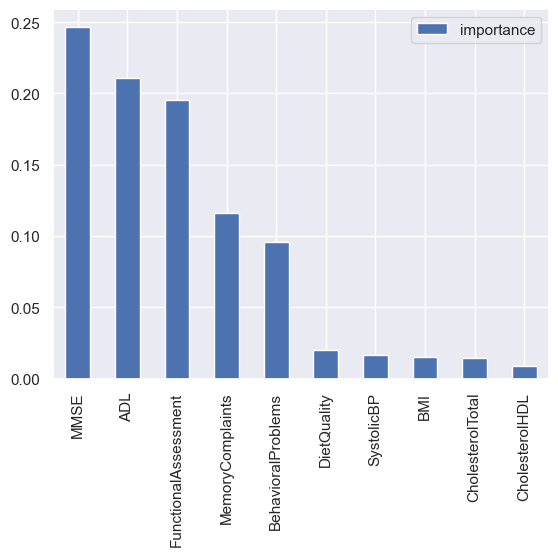

In [34]:
#shows the 10 most important factors contributing to disease

feature_importance.head(10).plot(kind='bar')  

### Plotting Decision Tree

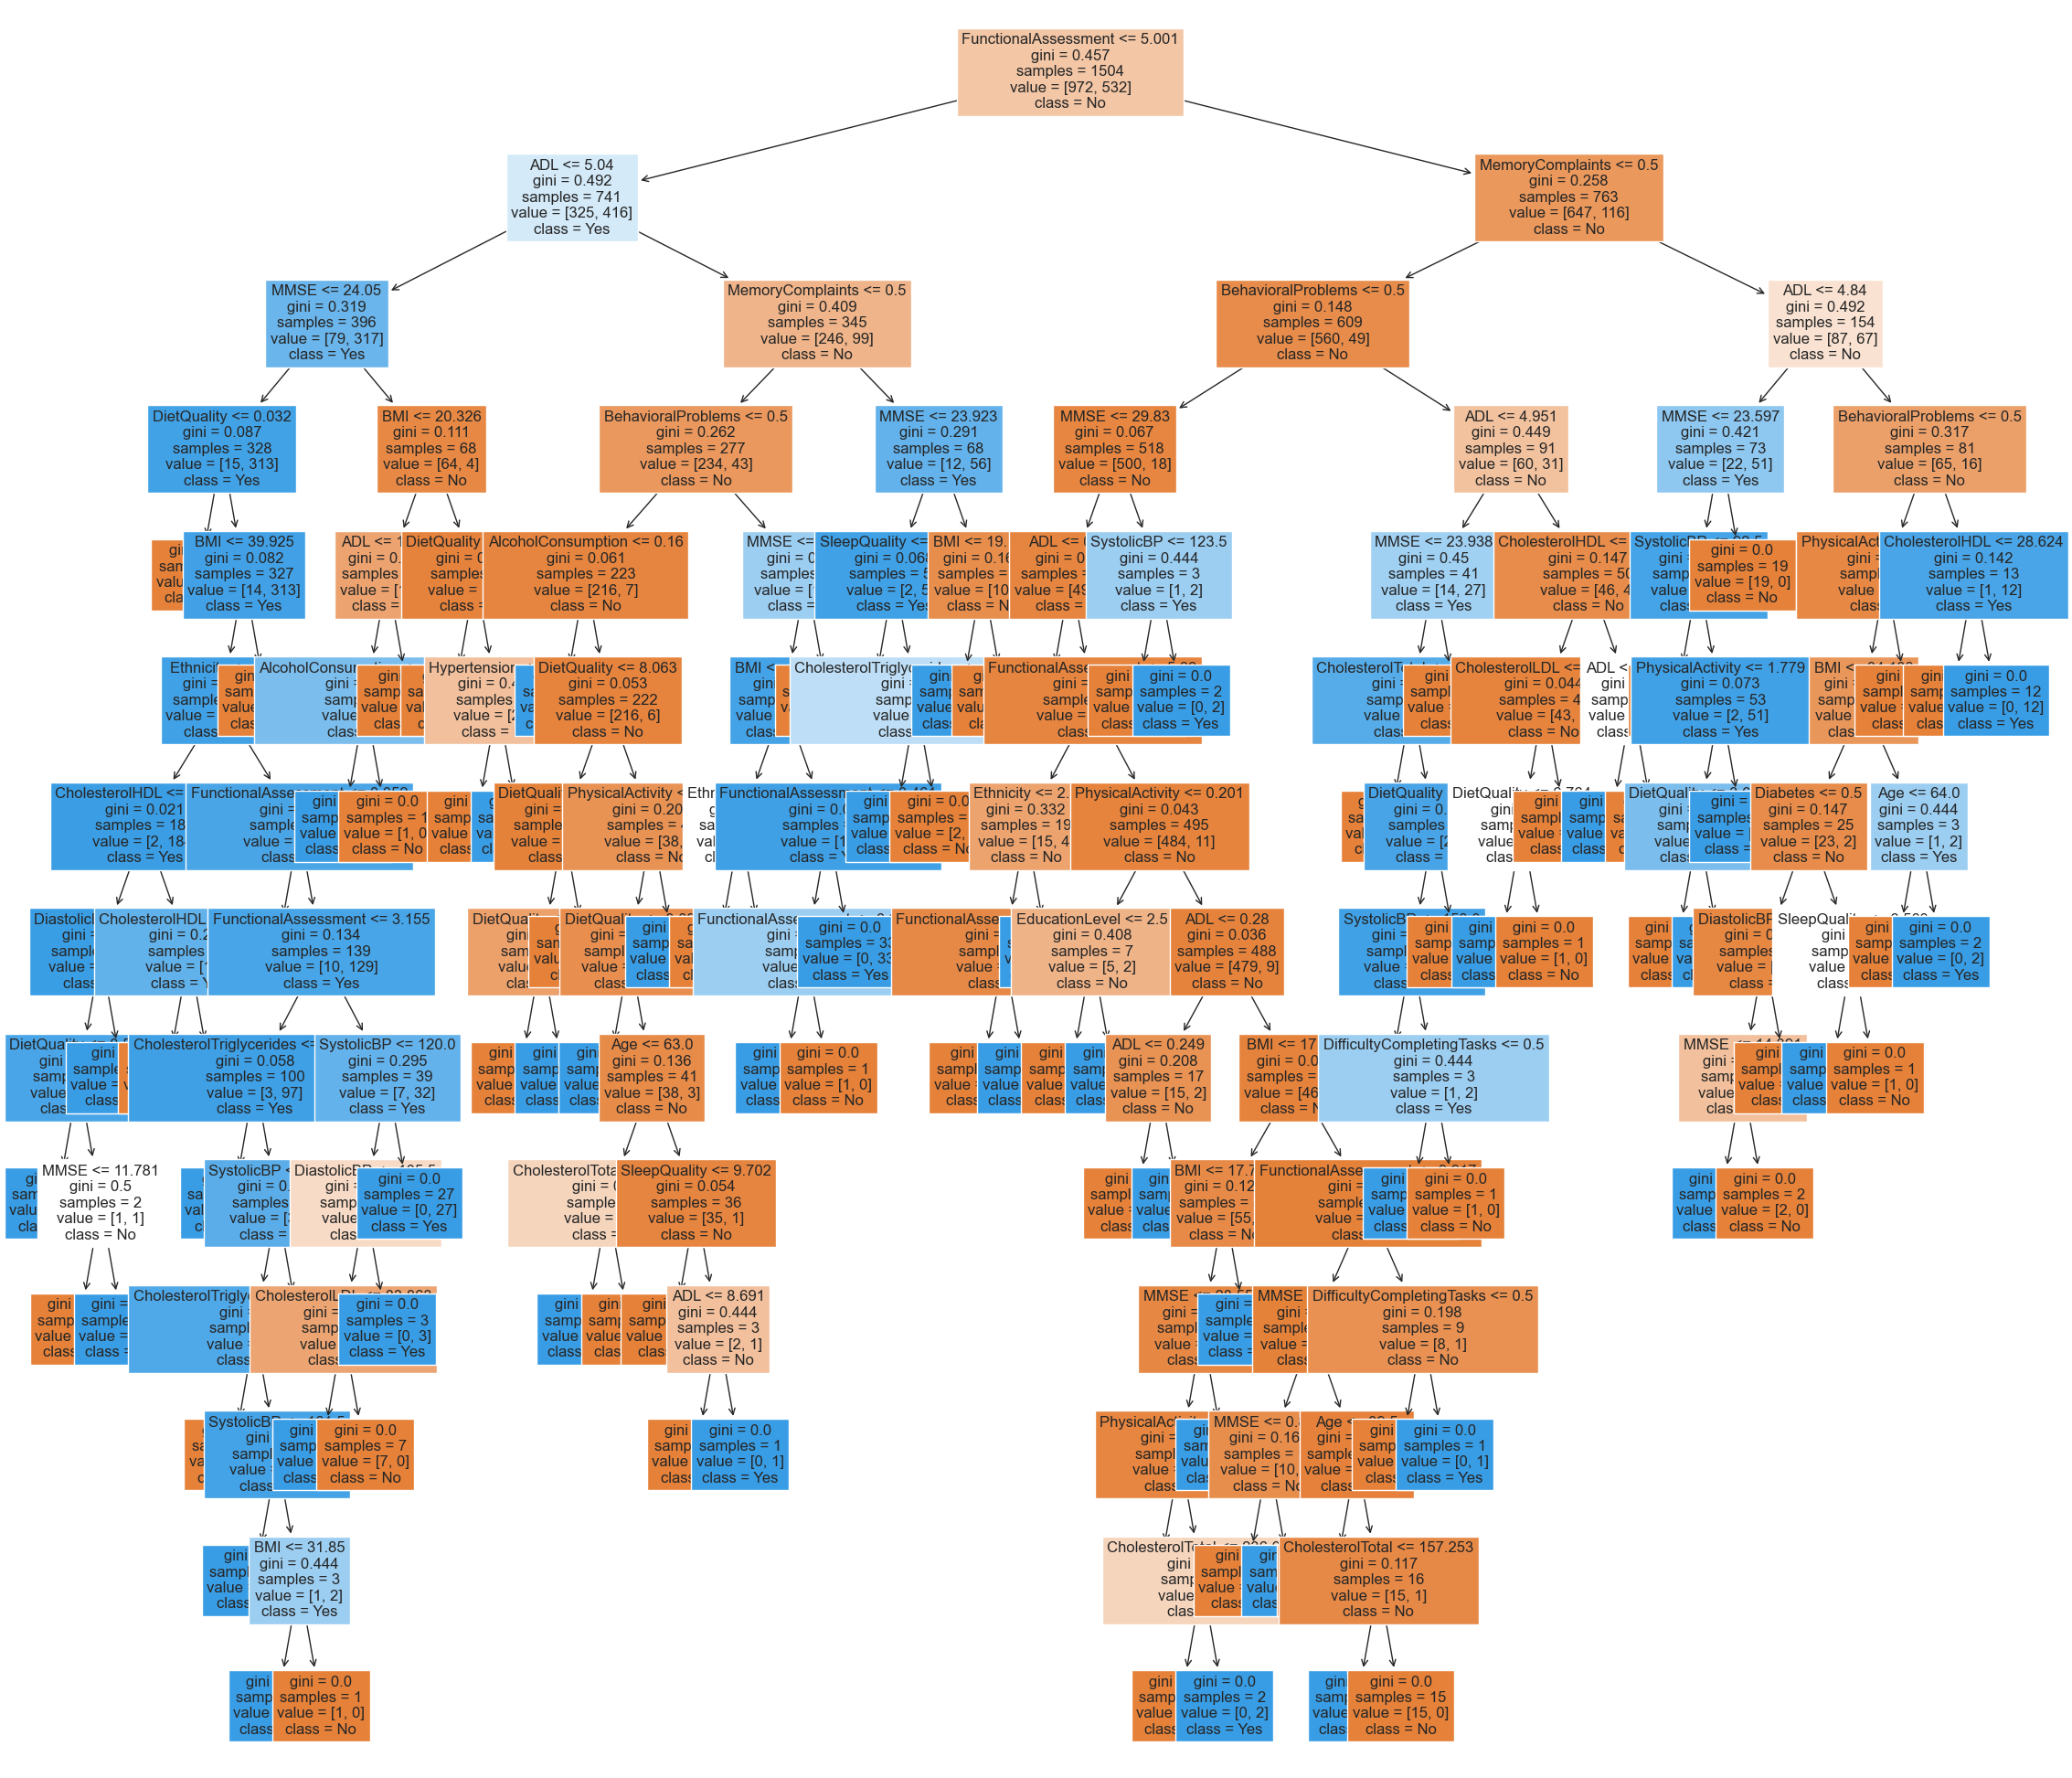

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(28,25))
plot_tree(tree, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, fontsize=12)

# Save the figure as a JPG file
plt.savefig("tree.jpg", format="jpeg")

plt.show()

### 8. Setting Hyperparameters to optimize the performance of the model:

### Decision Tree Classifier

The default parameter values controlling tree size (e.g., max_depth, min_samples_leaf, etc.) result in fully grown, unpruned trees, which can become excessively large for some datasets. To reduce memory consumption and manage tree complexity and size, these parameter values should be appropriately set.

In [36]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [37]:
# Fit the classifier to the training data

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Make predictions

y_predict = clf.predict(X_test)

### Hyperparameter Tuning:

To find the best combination of hyperparameters using technique such as Grid Search.

In [39]:
# Showing the default parameters being used

tree.get_params()   

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [40]:
# Define the parameter grid

parameters = {
    "ccp_alpha" : [0.01, 0.5, 1],  # Complexity parameter used for Minimal Cost-Complexity Pruning. So that the tree will not be overfitting.
    "max_depth" : [3, 5, 7, 10],   # The maximum depth of the tree
    "max_features" : [10, 16, 22]  # The inferred value of max_features randomly.
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Initialize Grid Search with cross-validation

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, n_jobs=-1, scoring='accuracy')

# GridSearchCV implements a “fit” and a “score” method. 
# Can lead to more efficient models that may require fewer resources to train effectively
# #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [43]:
# Fit Grid Search to the data

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.5, 1],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': [10, 16, 22]},
             scoring='accuracy')

In [44]:
# Get the best parameters and best score in accuracy

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'max_features': 22}
Best Accuracy: 0.9208704318936878


#### Improved Decision Tree after Feature Importance and Hyperparameter Tunning:

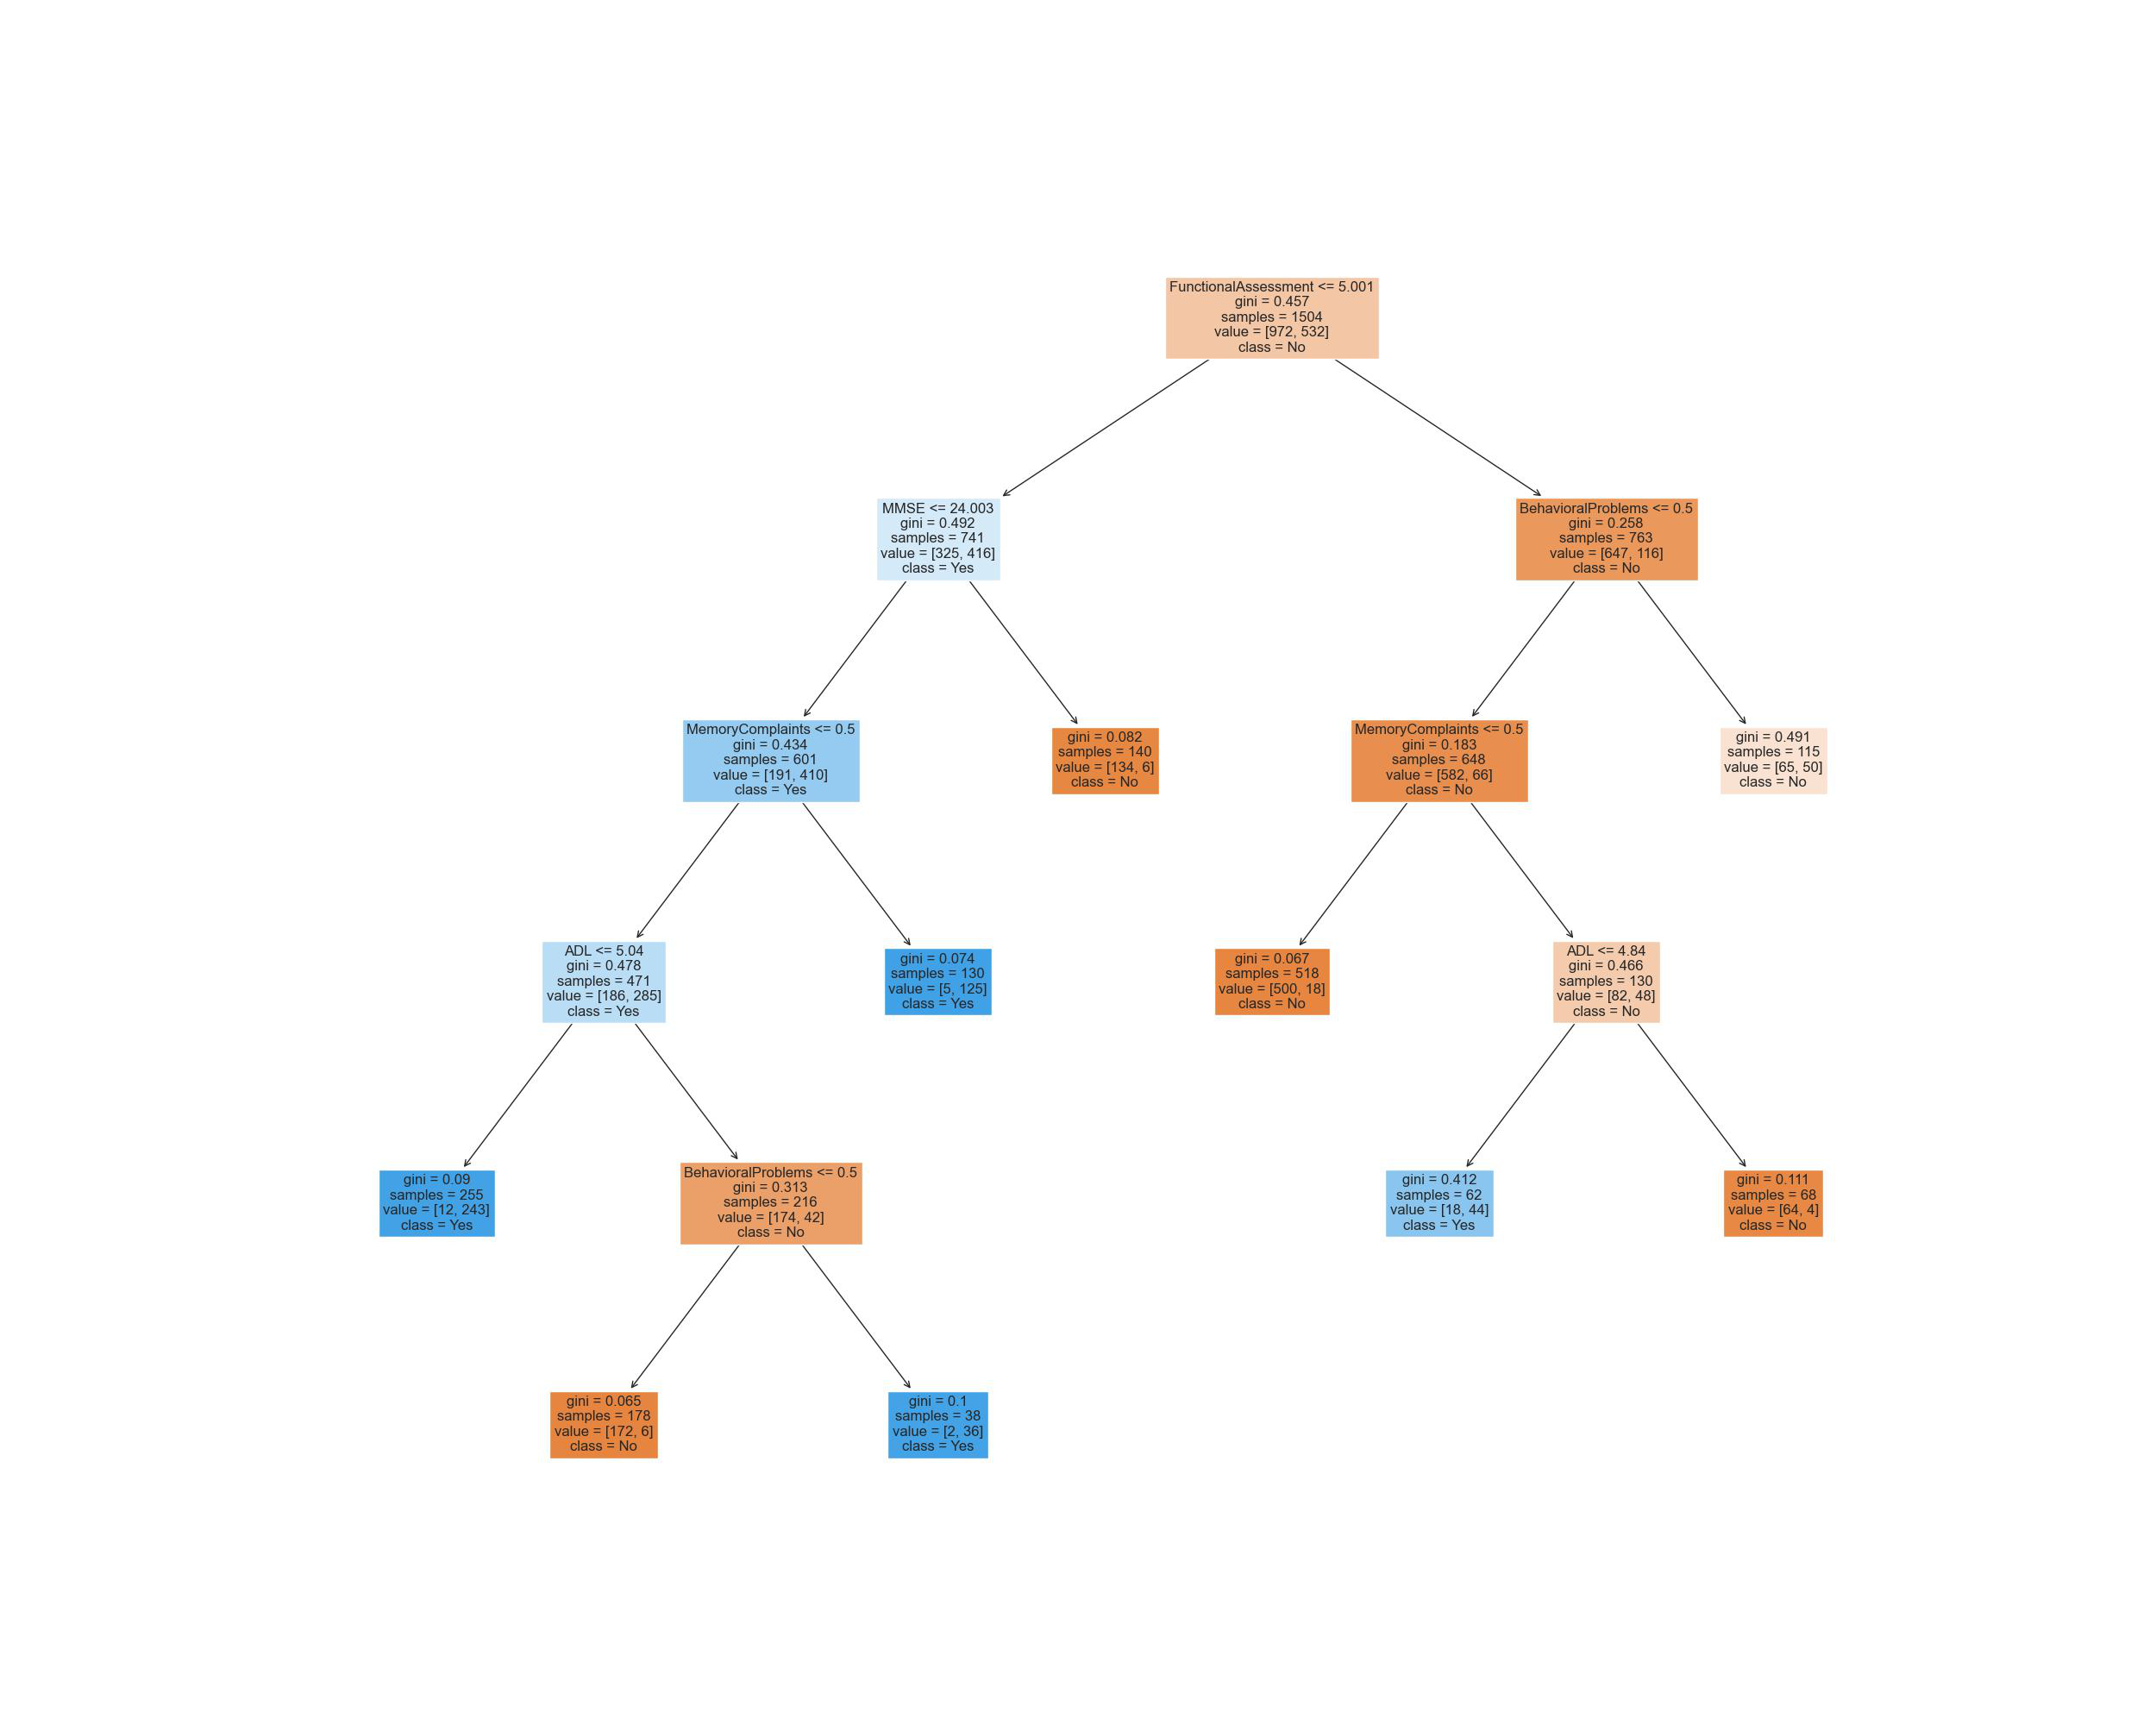

In [48]:
from PIL import Image
from IPython.display import display

# Path to your PNG image
image_path = r"C:\\Users\\weeqi\\tree(improved).jpg"

# Open and display the image
img = Image.open(image_path)
display(img)

### Observation from Model performance Evaluation: 
Based on the percentage accuracy, the Decision Tree model emerges as the most suitable for predicting Alzheimer’s disease diagnosis, achieving an accuracy rate of 92.08%. In the healthcare domain, machine learning model predictions are generally deemed successful when they attain an accuracy of 90% or higher.

Conclusion: Continue exploring other preprocessing steps, feature engineering, and model tuning to achieve better performance. Scaling is just one part of the preprocessing pipeline, and its impact can vary depending on the data and the specific characteristics of the machine learning algorithms used. Applying feature importance analysis and hyperparameter tuning in machine learning models can help improve model performance, stability, and robustness.